In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
print("Done....")

Done....


In [3]:
df_meal = pd.read_csv("meal_info.csv")
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
df_center = pd.read_csv("fulfilment_center_info.csv")
df_center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [8]:
df_food = pd.read_csv("train.csv")
df_food

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [11]:
df = pd.merge(df_food,df_center,on='center_id')
df = pd.merge(df , df_meal , on="meal_id")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


## Bar Graph using matplotlib

In [12]:
table = pd.pivot_table(data=df,index="category",values="num_orders" , aggfunc=np.sum)

In [13]:
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


**Bar graphs are best used when we need to compare the quantity of categorical values within the same category.**

<function matplotlib.pyplot.show(*args, **kw)>

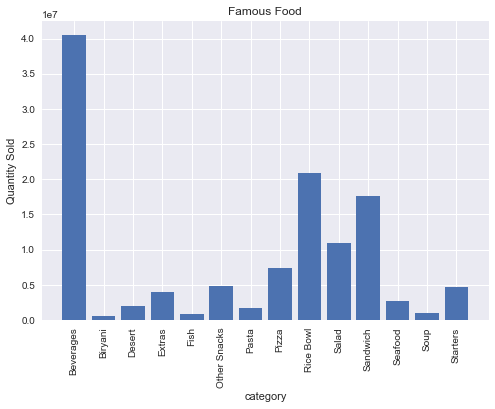

In [22]:
plt.bar(table.index,table['num_orders'])
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("Quantity Sold")
plt.title("Famous Food")
plt.show

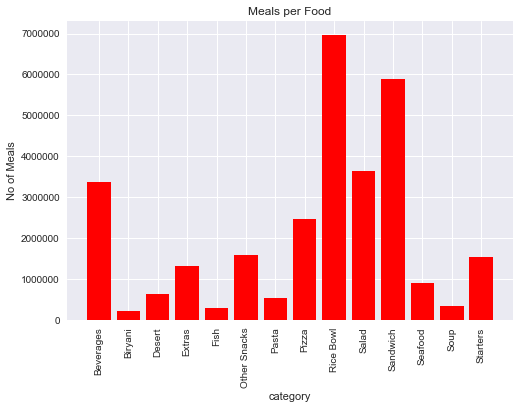

In [39]:
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]

plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='red')
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("No of Meals")
plt.title("Meals per Food")
plt.show()


In [73]:
d_cuisine = {}

#total number of order
total = df['num_orders'].sum()

#find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):

#cuisine
    c = df['cuisine'].unique()[i]

#num of orders for the cuisine
    c_order = df[df['cuisine']==c]['num_orders'].sum()
    d_cuisine[c] = c_order/total


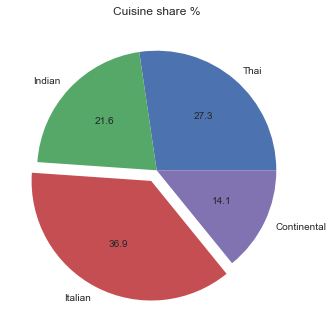

In [74]:
plt.pie([x*100 for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct='%0.1f',explode=[0,0,0.1,0]) 

#label the plot 
plt.title('Cuisine share %') 
plt.show();

### Box Plot using matplotlib

Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.

In [76]:
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

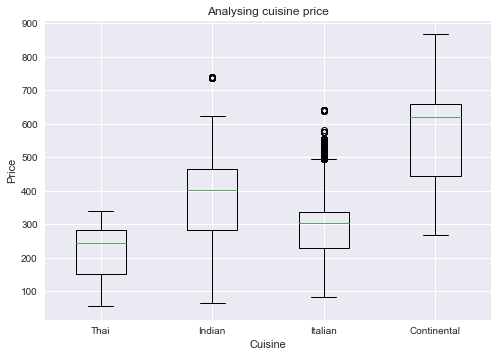

In [77]:
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()])

plt.xlabel('Cuisine')
plt.ylabel('Price')

plt.title('Analysing cuisine price')
plt.show()

Box plot does not show the distribution of data points within each group.

### Histogram using matplotlib

A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.

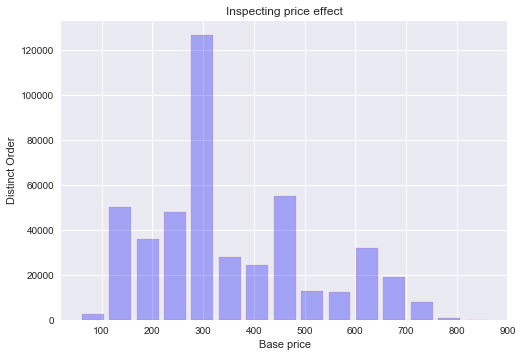

In [86]:
plt.hist(df['base_price'],rwidth=0.8,alpha=0.3,color='blue',bins=15,edgecolor='red')
plt.xlabel('Base price')
plt.ylabel('Distinct Order')
plt.title('Inspecting price effect')
plt.show()

**It is easy to confuse histograms with bar plots. But remember, histograms are used with continuous data whereas bar plots are used with categorical data**

### Line Plot and Subplots using matplotlib

A line plot is useful for visualizing the trend in a numerical value over a continuous time interval.

In [90]:
#new revenue column 
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 

#new month column 
df['month'] = df['week'].apply(lambda x: x//4) 

#list to store month-wise revenue 
month=[] 
month_order=[] 

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 
    
#list to store week-wise revenue 
week=[] 
week_order=[] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())
    

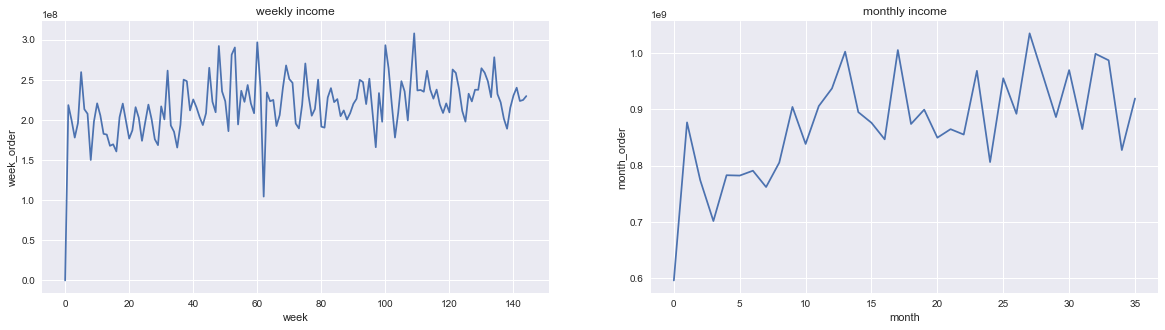

In [93]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))

ax[0].plot(week,week_order)
ax[0].set_xlabel('week')
ax[0].set_ylabel('week_order')
ax[0].set_title('weekly income')

ax[1].plot(month,month_order)
ax[1].set_xlabel('month')
ax[1].set_ylabel('month_order')
ax[1].set_title('monthly income')

plt.show()

## **Reference** https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/